# Customer Retention Analysis

## Libraries

In [95]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

Basic settings of dataframe and plots

In [2]:
# Pandas dataframes show all rows and columns without skiping
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Matplotlib setting of figsize and dpi
mpl.rcParams['figure.figsize'] = [16, 5]
mpl.rcParams['figure.dpi'] = 200

# Major colors
primary_color = "#fab005"
secondary_color = "#12b886"
tertiary_color = "#4c6ef5"

# Palette and cmap to use in seaborn plots
palette = ["#fab005", "#12b886", "#4c6ef5", "#7950f2","#be4bdb", "#d6336c"]
cmap = colors.ListedColormap(["#fab005", "#12b886", "#4c6ef5", "#7950f2","#be4bdb", "#d6336c"])

# Seaborn plot styles
sns.set_style(style='darkgrid')
sns.set(rc={'font.family': 'Verdana', 'font.size': 16})

%matplotlib inline

## Dataset

In [3]:
data = pd.read_excel('./data/teleco-customer-churn/telco_customer_churn.xlsx')

In [4]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Customer Profiling

In [5]:
df = data.copy()

### Data Preparation

In [6]:
df.shape

(7043, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

*About the columns in the dataset-*

- Demographic Information
    - tenure: The length of time a customer has been a customer of the business (multiple different number values)).
    - client’s “gender”: (Female, Male) Whether the client is a woman or a man.
    - SeniorCitizen: Indicates whether the client is an older person (0, 1).
    - Partner: Indicates whether or not the client is partnered (Yes, No).
    - Dependents: Indicates whether the client is supported by others (Yes, No).


- Customer Account Information
    - tenure: The length of time a customer has been a customer of the business (multiple different number values))
    - Contract: The type of existing contract for the customer (Month-to-Month, One-Year, Two-Year)
    - PaperlessBilling: Whether the client uses paperless billing (Yes, No)N
    - PaymentMethod: The chosen payment method by the consumer (credit card, bank transfer, electronic check, paper check)
    - MontlyCharges: The monthly charge made to the consumer (various numeric quantities)
    - TotalCharges (many different numeric values): The total amount charged to the consumer


- Service Information
    - Phone service: If the client has a phone service, it is indicated by the words “Yes” or “No”.
    - MultipleLines: Whether the customer has more than one line (no phone service, no service, yes service).
    - InternetServices: Whether the client has a subscription to the company’s Internet service (DSL, Fiber optic, or No).
    - OnlineSecurity: Indicates if the client has access to online security (Internet service available, No, Yes).
    - OnlineBackup: Indicates whether or not the client has an online backup (Internet service unavailable, No, Yes).
    - DeviceProtection: Indicates whether the client has device protection (Internet service not available, Not Available, Yes).
    - Tech support: Whether the customer has access to tech help (no internet service, no, yes).
    - Streaming TV: Whether the customer has access (no internet service, no, yes).
    - Streaming movies: Indicates whether or not the client offers or has access streaming movies(no internet service, no, yes).
 
- Churn Information
    - Churn Label: Whether the customer decided to leave the service or not ('yes' or 'no').
    - Churn Value: 0 or 1 depending on the churn value as 'no' or 'yes'.
    - Churn Reason: Reason for the customer to choose to leave.
 
- Customer Value
    - CLTV: Customer Lifetime Value if they stayed in the company as a customer.no, yes).sumer. No).

In [8]:
# Checking for rows that are duplicates
df.duplicated().sum()

0

*There are no duplicated present in the dataset.*

In [9]:
df.head(200)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [10]:
df['Count'].nunique()

1

In [11]:
df['Country'].nunique()

1

In [12]:
df['State'].nunique()

1

1. `Count`, `Country` & `State` are 3 features that will not contribute to model performance.
2. `Zip Code`, `Lat Long`, `Latitude` & `Longitude` also won't contribute as we are using `City` that will equally contribute to these 3 data.
3. `Churn Label` won't help as we already have `Churn Value`.
4. We are going to drop these features.

In [13]:
df_dropped = df.drop(['Count', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label'], axis=1)
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

In [14]:
df = df_dropped.copy()

In [15]:
df['Total Charges'].dtype

dtype('O')

*`Total Charges` features should be float instead of Object.*

In [16]:
df_correct_type = df.copy()
df_correct_type['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [17]:
df_correct_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   City               7043 non-null   object 
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract           7043 

*Due to converting `Total Charges` into `Float`, some values which were invalid became NaN and total non-NaN cells in that column now is 7032.*

In [57]:
df = df_correct_type.copy()

In [58]:
missing_row_columns = ['Total Charges']
df_cleaned = df.dropna(subset=missing_row_columns, ignore_index=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   City               7032 non-null   object 
 2   Gender             7032 non-null   object 
 3   Senior Citizen     7032 non-null   object 
 4   Partner            7032 non-null   object 
 5   Dependents         7032 non-null   object 
 6   Tenure Months      7032 non-null   int64  
 7   Phone Service      7032 non-null   object 
 8   Multiple Lines     7032 non-null   object 
 9   Internet Service   7032 non-null   object 
 10  Online Security    7032 non-null   object 
 11  Online Backup      7032 non-null   object 
 12  Device Protection  7032 non-null   object 
 13  Tech Support       7032 non-null   object 
 14  Streaming TV       7032 non-null   object 
 15  Streaming Movies   7032 non-null   object 
 16  Contract           7032 

In [60]:
df = df_cleaned.copy()

In [61]:
# Remove answers from the dataset
drop_features = ['CustomerID', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason']
df_segmenting_features = df.drop(columns=drop_features)

In [82]:
df = df_segmenting_features.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7032 non-null   object 
 1   Gender             7032 non-null   object 
 2   Senior Citizen     7032 non-null   object 
 3   Partner            7032 non-null   object 
 4   Dependents         7032 non-null   object 
 5   Tenure Months      7032 non-null   int64  
 6   Phone Service      7032 non-null   object 
 7   Multiple Lines     7032 non-null   object 
 8   Internet Service   7032 non-null   object 
 9   Online Security    7032 non-null   object 
 10  Online Backup      7032 non-null   object 
 11  Device Protection  7032 non-null   object 
 12  Tech Support       7032 non-null   object 
 13  Streaming TV       7032 non-null   object 
 14  Streaming Movies   7032 non-null   object 
 15  Contract           7032 non-null   object 
 16  Paperless Billing  7032 

In [83]:
# Encode the categorical columns
categorical_features = ['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 
                        'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 
                        'Paperless Billing', 'Payment Method']

encoder = OrdinalEncoder()
encoded_data = encoder.fit_transform(df[categorical_features])

df_encoded = df.copy()
df_encoded[categorical_features] = pd.DataFrame(encoded_data)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7032 non-null   float64
 1   Gender             7032 non-null   float64
 2   Senior Citizen     7032 non-null   float64
 3   Partner            7032 non-null   float64
 4   Dependents         7032 non-null   float64
 5   Tenure Months      7032 non-null   int64  
 6   Phone Service      7032 non-null   float64
 7   Multiple Lines     7032 non-null   float64
 8   Internet Service   7032 non-null   float64
 9   Online Security    7032 non-null   float64
 10  Online Backup      7032 non-null   float64
 11  Device Protection  7032 non-null   float64
 12  Tech Support       7032 non-null   float64
 13  Streaming TV       7032 non-null   float64
 14  Streaming Movies   7032 non-null   float64
 15  Contract           7032 non-null   float64
 16  Paperless Billing  7032 

In [84]:
df = df_encoded.copy()

In [85]:
# Build the standardizer
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Copy the dataframe
df_scaled = df.copy()
df_scaled = pd.DataFrame(data_scaled)
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7032 non-null   float64
 1   1       7032 non-null   float64
 2   2       7032 non-null   float64
 3   3       7032 non-null   float64
 4   4       7032 non-null   float64
 5   5       7032 non-null   float64
 6   6       7032 non-null   float64
 7   7       7032 non-null   float64
 8   8       7032 non-null   float64
 9   9       7032 non-null   float64
 10  10      7032 non-null   float64
 11  11      7032 non-null   float64
 12  12      7032 non-null   float64
 13  13      7032 non-null   float64
 14  14      7032 non-null   float64
 15  15      7032 non-null   float64
 16  16      7032 non-null   float64
 17  17      7032 non-null   float64
 18  18      7032 non-null   float64
 19  19      7032 non-null   float64
dtypes: float64(20)
memory usage: 1.1 MB


In [86]:
df = df_scaled.copy()

In [87]:
# Apply PCA to reduce the no of features into 3 features only
pca = PCA(n_components=3)

reduction_data = pca.fit_transform(df)

df_reduction = pd.DataFrame(reduction_data, columns=['dim1', 'dim2', 'dim3'])
df_reduction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dim1    7032 non-null   float64
 1   dim2    7032 non-null   float64
 2   dim3    7032 non-null   float64
dtypes: float64(3)
memory usage: 164.9 KB


In [89]:
df = df_reduction.copy()

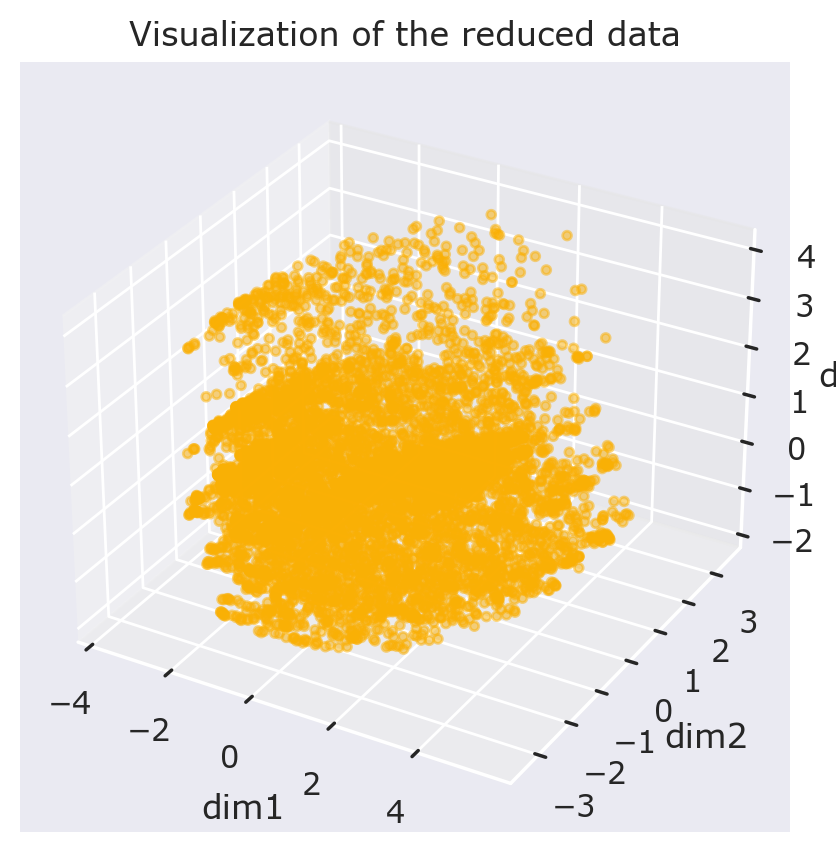

In [93]:
# Visualize the reduced dimension of the data
ax = plt.axes(projection='3d')

X = df['dim1'].to_numpy()
Y = df['dim2'].to_numpy()
Z = df['dim3'].to_numpy()

ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 

ax.scatter3D(X, Y, Z, c=primary_color, s=10, alpha=0.5)

ax.set_title("Visualization of the reduced data")
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')
plt.show()

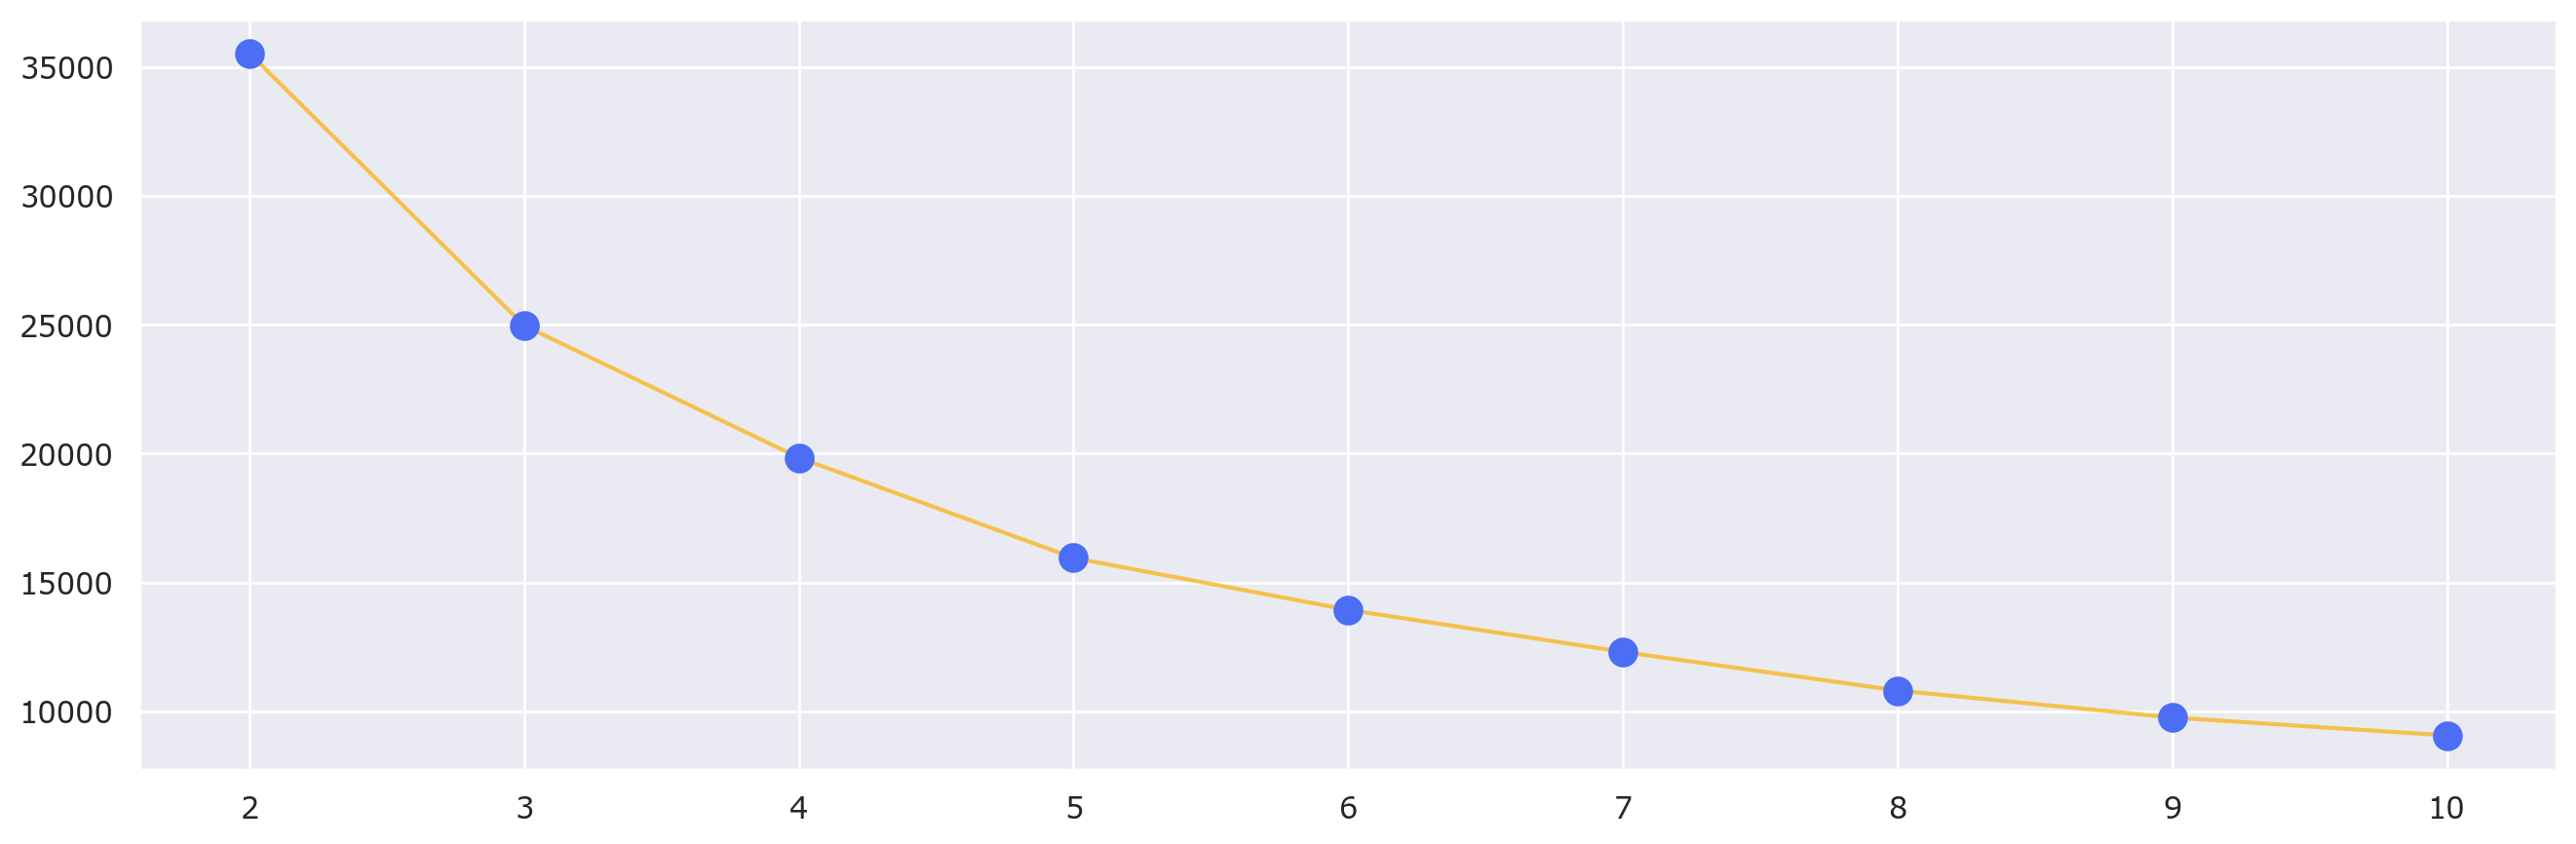

In [101]:
# Fit the K-Means model into the data
inertias = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=0, algorithm='elkan')
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

x = list(range(2, 11))
y = inertias

plt.plot(x, y, '-', c=primary_color, alpha=0.7)
plt.plot(x, y, 'o', c=tertiary_color, markersize=10)

plt.show()

In [103]:
final_kmeans = KMeans(n_clusters=5, n_init=10, random_state=0, algorithm='elkan')
final_kmeans.fit(df)
final_kmeans.cluster_centers_

array([[ 0.48220086,  0.84347344,  1.7659423 ],
       [-2.21035144, -0.58952573,  0.59035415],
       [-0.59145163,  1.94214098, -1.20344026],
       [ 3.18852635, -0.3347519 ,  0.01166565],
       [ 0.07695753, -1.64299112, -0.59519468]])

In [106]:
# Predict which cluster each data point belongs to and save these cluster values
clusters = final_kmeans.predict(df)

df_encoded_cluster = df_encoded.copy()
df_encoded_cluster['Cluster'] = clusters

df_reduction_cluster = df_reduction.copy()
df_reduction_cluster['Cluster'] = clusters

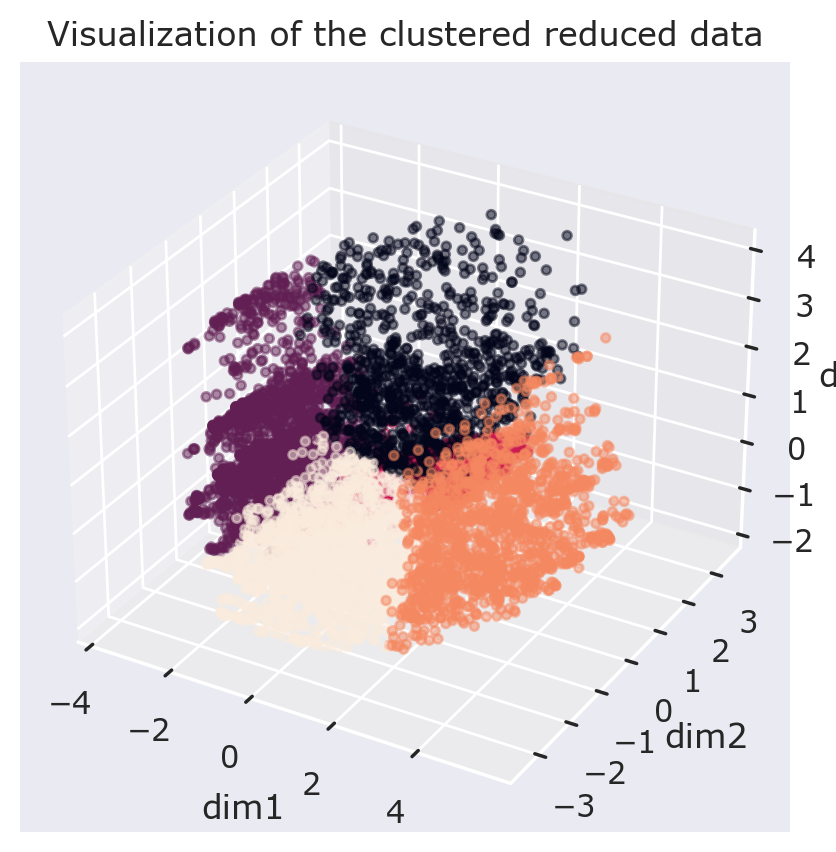

In [108]:
# Visualize the same reduced dimension data but this type apply colors for different cluster value
ax = plt.axes(projection='3d')

X = df['dim1'].to_numpy()
Y = df['dim2'].to_numpy()
Z = df['dim3'].to_numpy()

ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 

ax.scatter3D(X, Y, Z, c=df_reduction_cluster['Cluster'], s=10, alpha=0.5)

ax.set_title("Visualization of the clustered reduced data")
ax.set_xlabel('dim1')
ax.set_ylabel('dim2')
ax.set_zlabel('dim3')
plt.show()

In [ ]:
# Find out the important aspects of the clusters


In [ ]:
# With cluster and customer data, find out the behaviour pattern of the customers of different clusters that aligns with their churn behaviour


## Customer Churn Prediction